# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# importing dependencies.
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
# generate random list of 2000 latitude and longitute.
# i did 2000 because i tried with 1000 but kept getting less than 500 cities.
lat = np.random.uniform(low=-90, high=90, size=2000)
long = np.random.uniform(low=-180, high=180, size=2000)
city_list = []

# loop through the latitute and longitude and find nearest city.
# add the city if it is unique.
for x in range(2000):
    add_city = citipy.nearest_city(lat[x], long[x]).city_name
    
    if add_city not in city_list:
        city_list.append(add_city)

# check number of cities
len(city_list)

767

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# making empty list for storing purpose
city_df_list = []
lat_df_list = []
long_df_list = []
max_temp = []
humid = []
cloud = []
wind_spd = []
country = []
timezone = []

# make url and generate output lines
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
print(f"Begining Data Retrieval of {len(city_list)} Cities Generated")
print(f"------------------------------------------------------------")
record_count = 1

# loop through the list of cities in the list made earlier
# add exception handling in case the city is not found in weather api
for city in city_list:
    try:
        response = requests.get(query_url + city).json()
        city_df_list.append(response["name"])
        lat_df_list.append(response["coord"]["lat"])
        long_df_list.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_spd.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        timezone.append(response["timezone"])
        
        print(f"Processing Record #{record_count} of {len(city_list)}: {city}")
        record_count = record_count + 1
              
    except KeyError:
        print(f"Processing Record #{record_count} of {len(city_list)}: FAIL: CITY NOT FOUND")
        record_count = record_count + 1

Begining Data Retrieval of 767 Cities Generated
------------------------------------------------------------
Processing Record #1 of 767: lata
Processing Record #2 of 767: puerto ayora
Processing Record #3 of 767: kodiak
Processing Record #4 of 767: presidencia roque saenz pena
Processing Record #5 of 767: FAIL: CITY NOT FOUND
Processing Record #6 of 767: FAIL: CITY NOT FOUND
Processing Record #7 of 767: bathsheba
Processing Record #8 of 767: FAIL: CITY NOT FOUND
Processing Record #9 of 767: gorontalo
Processing Record #10 of 767: qaanaaq
Processing Record #11 of 767: butaritari
Processing Record #12 of 767: khatanga
Processing Record #13 of 767: ushuaia
Processing Record #14 of 767: mataura
Processing Record #15 of 767: saint george
Processing Record #16 of 767: paamiut
Processing Record #17 of 767: ponta do sol
Processing Record #18 of 767: cape town
Processing Record #19 of 767: viloco
Processing Record #20 of 767: georgetown
Processing Record #21 of 767: villanueva de la serena
Pro

Processing Record #200 of 767: haines junction
Processing Record #201 of 767: gimli
Processing Record #202 of 767: sampit
Processing Record #203 of 767: lodja
Processing Record #204 of 767: krasnogvardeyskoye
Processing Record #205 of 767: bartica
Processing Record #206 of 767: port macquarie
Processing Record #207 of 767: port elizabeth
Processing Record #208 of 767: ribeira grande
Processing Record #209 of 767: geraldton
Processing Record #210 of 767: FAIL: CITY NOT FOUND
Processing Record #211 of 767: urumqi
Processing Record #212 of 767: san carlos de bariloche
Processing Record #213 of 767: olenino
Processing Record #214 of 767: faya
Processing Record #215 of 767: nantucket
Processing Record #216 of 767: FAIL: CITY NOT FOUND
Processing Record #217 of 767: kapaa
Processing Record #218 of 767: nanortalik
Processing Record #219 of 767: FAIL: CITY NOT FOUND
Processing Record #220 of 767: voh
Processing Record #221 of 767: nijar
Processing Record #222 of 767: zonguldak
Processing Recor

Processing Record #399 of 767: gilbues
Processing Record #400 of 767: FAIL: CITY NOT FOUND
Processing Record #401 of 767: interlaken
Processing Record #402 of 767: touros
Processing Record #403 of 767: hamilton
Processing Record #404 of 767: seoul
Processing Record #405 of 767: san joaquin
Processing Record #406 of 767: barras
Processing Record #407 of 767: rosetta
Processing Record #408 of 767: egvekinot
Processing Record #409 of 767: ketchikan
Processing Record #410 of 767: katsuura
Processing Record #411 of 767: tura
Processing Record #412 of 767: mutoko
Processing Record #413 of 767: kuala terengganu
Processing Record #414 of 767: mendi
Processing Record #415 of 767: dudinka
Processing Record #416 of 767: pastos bons
Processing Record #417 of 767: marienburg
Processing Record #418 of 767: mazara del vallo
Processing Record #419 of 767: la fleche
Processing Record #420 of 767: westport
Processing Record #421 of 767: comodoro rivadavia
Processing Record #422 of 767: chifeng
Processin

Processing Record #600 of 767: poum
Processing Record #601 of 767: mount hagen
Processing Record #602 of 767: sawtell
Processing Record #603 of 767: provo
Processing Record #604 of 767: gazojak
Processing Record #605 of 767: quatre cocos
Processing Record #606 of 767: tobol
Processing Record #607 of 767: turrialba
Processing Record #608 of 767: brae
Processing Record #609 of 767: baykit
Processing Record #610 of 767: troitsko-pechorsk
Processing Record #611 of 767: sorland
Processing Record #612 of 767: mindelo
Processing Record #613 of 767: half moon bay
Processing Record #614 of 767: banamba
Processing Record #615 of 767: kota tinggi
Processing Record #616 of 767: san luis
Processing Record #617 of 767: FAIL: CITY NOT FOUND
Processing Record #618 of 767: holme
Processing Record #619 of 767: sobolevo
Processing Record #620 of 767: chalons-en-champagne
Processing Record #621 of 767: palmer
Processing Record #622 of 767: keuruu
Processing Record #623 of 767: tocache
Processing Record #6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# put the extracted data into a dictionary
city_data_dict = {"City": city_df_list,
                 "Lat": lat_df_list,
                 "Lng": long_df_list,
                 "Max Temp": max_temp,
                 "Humidity": humid,
                 "Cloudiness": cloud,
                 "Wind Speed": wind_spd,
                 "Country": country,
                 "Time Zone": timezone}

# convert to dataframe, and export it to resource folder in my repository
city_data_df = pd.DataFrame(city_data_dict)
city_data_df.to_csv("output_resource/city_data.csv")
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Time Zone
0,Lata,40.16,-8.33,73.99,75,62,5.01,PT,3600
1,Puerto Ayora,-0.74,-90.35,70.00,77,87,10.00,EC,-21600
2,Saint Paul Harbor,57.79,-152.41,51.80,81,90,10.29,US,-28800
3,Presidencia Roque Sáenz Peña,-26.79,-60.44,81.99,17,0,6.98,AR,-10800
4,Bathsheba,13.22,-59.52,89.60,66,20,11.41,BB,-14400
...,...,...,...,...,...,...,...,...,...
702,Jalu,29.03,21.55,80.24,33,0,6.60,LY,7200
703,Wamba,8.93,8.60,76.53,81,27,2.30,NG,3600
704,Beringovskiy,63.05,179.32,39.63,71,10,7.23,RU,43200
705,Oranjemund,-28.55,16.43,67.68,35,0,21.97,NA,7200


In [20]:
# display dataframe summary
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Time Zone
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,21.230325,18.781132,65.673536,68.438472,47.039604,7.777624,7431.683168
std,32.928642,90.766041,15.951350,21.629250,36.780046,5.212659,20811.249079
min,-54.800000,-179.170000,15.170000,1.000000,0.000000,0.380000,-39600.000000
25%,-6.250000,-63.975000,54.000000,56.000000,7.500000,3.870000,-10800.000000
50%,26.420000,25.140000,68.000000,74.000000,40.000000,6.930000,7200.000000
75%,48.690000,101.615000,78.350000,85.000000,80.500000,10.290000,25200.000000
max,78.220000,179.320000,106.450000,100.000000,100.000000,34.110000,46800.000000


In [21]:
# checking for city with humid > 100%

city_data_df.loc[city_data_df["Humidity"] > 100, "City"].head()

Series([], Name: City, dtype: object)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

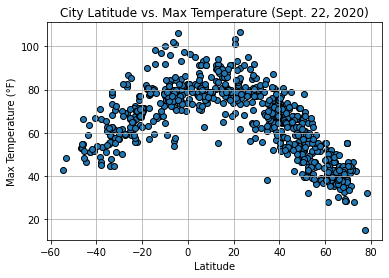

In [22]:
# make scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")
plt.grid()

# add labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("City Latitude vs. Max Temperature (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

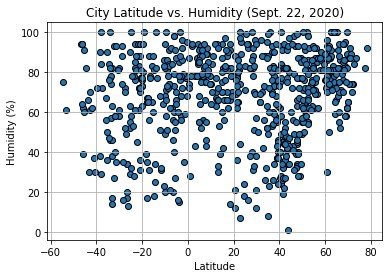

In [23]:
# make scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")
plt.grid()

# add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/lat_vs_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

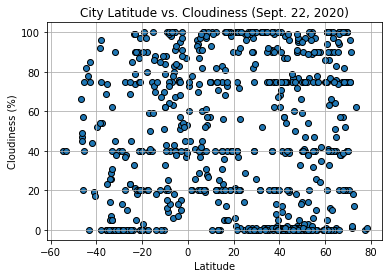

In [24]:
# make scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")
plt.grid()

# add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

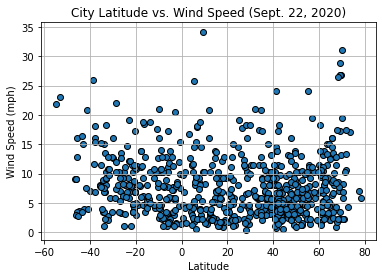

In [25]:
# make scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")
plt.grid()

# add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/lat_vs_wind_speed.png")
plt.show()

## Linear Regression

In [33]:
# split the original dataframe into two hemispheres using loc
city_NH_data_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]
city_SH_data_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.854172298870046


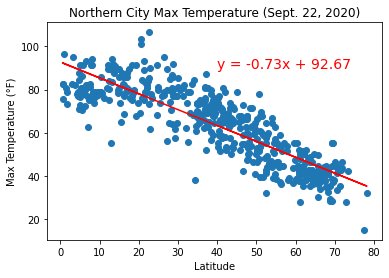

In [49]:
# get the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_NH_data_df["Lat"], city_NH_data_df["Max Temp"])
regress_value = city_NH_data_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# plot regression and data together
plt.plot(city_NH_data_df["Lat"], regress_value, "r-")
plt.annotate(line_eq, (40, 90), fontsize=14, color="red")
plt.scatter(city_NH_data_df["Lat"], city_NH_data_df["Max Temp"])

# add labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Northern City Max Temperature (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/NH_lat_vs_temp.png")
print(f"The r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6979405108725529


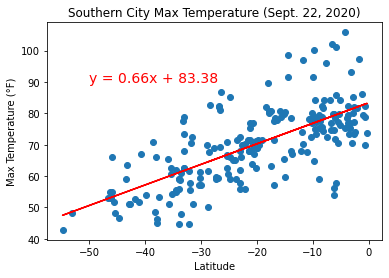

In [55]:
# get the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_SH_data_df["Lat"], city_SH_data_df["Max Temp"])
regress_value = city_SH_data_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# plot regression and data together
plt.plot(city_SH_data_df["Lat"], regress_value, "r-")
plt.annotate(line_eq, (-50, 90), fontsize=14, color="red")
plt.scatter(city_SH_data_df["Lat"], city_SH_data_df["Max Temp"])

# add labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Southern City Max Temperature (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/SH_lat_vs_temp.png")
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# I noticed that for northern cities have a negative correlation where the southern cities have
# positive correlation. This makes sense since the more north you get (higher x value on the
# northern city data), the temperature should be falling. Similarly the closer to the equator
# you get (higher x value on the southern city data), temperature should be rising.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.08277885908109323


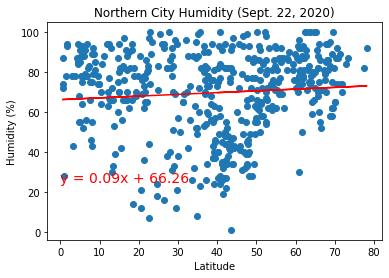

In [44]:
# get the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_NH_data_df["Lat"], city_NH_data_df["Humidity"])
regress_value = city_NH_data_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# plot regression and data together
plt.plot(city_NH_data_df["Lat"], regress_value, "r-")
plt.annotate(line_eq, (0, 25), fontsize=14, color="red")
plt.scatter(city_NH_data_df["Lat"], city_NH_data_df["Humidity"])

# add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern City Humidity (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/NH_lat_vs_humid.png")
print(f"The r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.0904418245225418


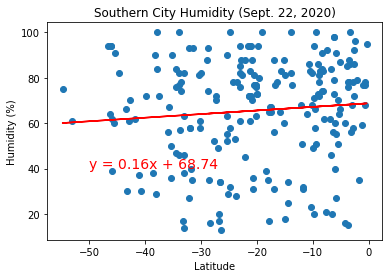

In [60]:
# get the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_SH_data_df["Lat"], city_SH_data_df["Humidity"])
regress_value = city_SH_data_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# plot regression and data together
plt.plot(city_SH_data_df["Lat"], regress_value, "r-")
plt.annotate(line_eq, (-50, 40), fontsize=14, color="red")
plt.scatter(city_SH_data_df["Lat"], city_SH_data_df["Humidity"])

# add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern City Humidity (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/SH_lat_vs_humid.png")
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# I noticed that both data have positive correlation. But this is really hard to analyize
# because the correlation coefficient value for both data is really low, which shows that
# both data have very low correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.03147573848659776


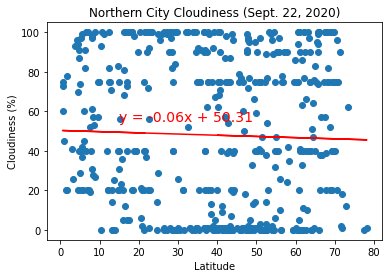

In [46]:
# get the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_NH_data_df["Lat"], city_NH_data_df["Cloudiness"])
regress_value = city_NH_data_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# plot regression and data together
plt.plot(city_NH_data_df["Lat"], regress_value, "r-")
plt.annotate(line_eq, (15, 55), fontsize=14, color="red")
plt.scatter(city_NH_data_df["Lat"], city_NH_data_df["Cloudiness"])

# add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern City Cloudiness (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/NH_lat_vs_cloud.png")
print(f"The r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2660322949981028


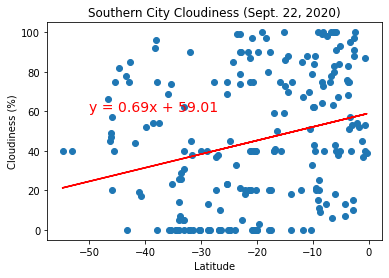

In [61]:
# get the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_SH_data_df["Lat"], city_SH_data_df["Cloudiness"])
regress_value = city_SH_data_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# plot regression and data together
plt.plot(city_SH_data_df["Lat"], regress_value, "r-")
plt.annotate(line_eq, (-50, 60), fontsize=14, color="red")
plt.scatter(city_SH_data_df["Lat"], city_SH_data_df["Cloudiness"])

# add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern City Cloudiness (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/SH_lat_vs_cloud.png")
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# I noticed that the southern city data have oddly high correlation coefficient value. But the
# northern data still looks like too scattered randomly to come up with any correlation
# relation with latitude vs. cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.09262868408256576


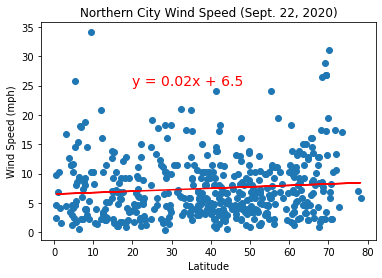

In [58]:
# get the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_NH_data_df["Lat"], city_NH_data_df["Wind Speed"])
regress_value = city_NH_data_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# plot regression and data together
plt.plot(city_NH_data_df["Lat"], regress_value, "r-")
plt.annotate(line_eq, (20, 25), fontsize=14, color="red")
plt.scatter(city_NH_data_df["Lat"], city_NH_data_df["Wind Speed"])

# add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern City Wind Speed (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/NH_lat_vs_wind_speed.png")
print(f"The r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2153366725195257


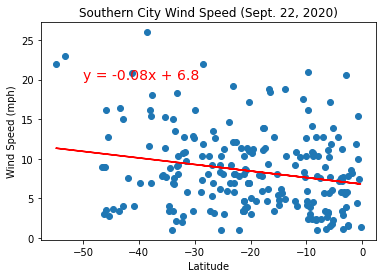

In [62]:
# get the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_SH_data_df["Lat"], city_SH_data_df["Wind Speed"])
regress_value = city_SH_data_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# plot regression and data together
plt.plot(city_SH_data_df["Lat"], regress_value, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=14, color="red")
plt.scatter(city_SH_data_df["Lat"], city_SH_data_df["Wind Speed"])

# add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern City Wind Speed (Sept. 22, 2020)")

# save and show
plt.savefig("output_resource/SH_lat_vs_wind_speed.png")
print(f"The r-value is {rvalue}")
plt.show()

In [ ]:
# I noticed that northern city has positive and southern city has negative correlation. But judging from
# the slope value, i noticed that slope is almost zero, which shows that the wind speed just averages
# throughout both northern and southern by somewhere between 6.5 and 6.8 mph.